In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Input, Dense, Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

A) Use three hidden-layers of sizes 32, 64 and 128 and display the genrated DNN with the required number of parameters

In [ ]:
inputs = Input((1,))
x = Dense(32, activation = 'relu')(inputs)
x = Dense(64, activation = 'relu')(x)
x = Dense(128, activation = 'linear')(x)
outputs = Dense(1, name = 'OutputLayer', activation = 'linear')(x)
dnn_model = Model(inputs, outputs, name = 'DNN')
dnn_model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

B) Generate the trainning samples withing the range -20 to +20 then normalization

In [ ]:
x = np.arange(-20, 20, 0.1)
y = 5*pow(x,3) - 10*pow(x,2) - 20 * x + 10
#Print some values of x and y
print(x[:10])
print(y[:10])

# Normalize x to the range [-1, 1]
x_normalized = 2 * (x - np.min(x)) / (np.max(x) - np.min(x)) - 1

# Normalize y to the range [-1, 1]
y_normalized = 2 * (y - np.min(y)) / (np.max(y) - np.min(y)) - 1

print("Normalized x values:", x_normalized[:10])
print("Normalized y values:", y_normalized[:10])


[-20.  -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1]
[-43590.    -42955.095 -42326.36  -41703.765 -41087.28  -40476.875
 -39872.52  -39274.185 -38681.84  -38095.455]
Normalized x values: [-1.         -0.99498747 -0.98997494 -0.98496241 -0.97994987 -0.97493734
 -0.96992481 -0.96491228 -0.95989975 -0.95488722]
Normalized y values: [-1.         -0.98385388 -0.96786467 -0.9520316  -0.93635391 -0.92083084
 -0.90546163 -0.89024551 -0.87518173 -0.86026951]


C) Use 5% as sample test data and 5% as sample validation data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_normalized, test_size=0.05, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05/0.95, random_state=42)

print("Train data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)
print("Validation data shape:", x_val.shape, y_val.shape)

Train data shape: (360,) (360,)
Test data shape: (20,) (20,)
Validation data shape: (20,) (20,)


In [ ]:
# dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history = dnn_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

In [ ]:
dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])
history = dnn_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 8.8627e-04 - loss: 0.0958 - mae: 0.2254 - val_accuracy: 0.0000e+00 - val_loss: 0.0185 - val_mae: 0.1187
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0041 - loss: 0.0295 - mae: 0.1526 - val_accuracy: 0.0000e+00 - val_loss: 0.0122 - val_mae: 0.0910
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0041 - loss: 0.0197 - mae: 0.1136 - val_accuracy: 0.0000e+00 - val_loss: 0.0044 - val_mae: 0.0570
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0053 - loss: 0.0182 - mae: 0.1059 - val_accuracy: 0.0000e+00 - val_loss: 0.0054 - val_mae: 0.0603
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0077 - loss: 0.0138 - mae: 0.0937 - val_accuracy: 0.0000e+00 - val_loss: 0.0025 - val_mae: 0.0402
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0015 - loss: 0.0096 - mae: 0.0727 - val_accuracy: 0.0000e+00 - val_loss: 0.0036 - val_mae: 0.0452
Epoch 7/20
12/12 ━━━━━━

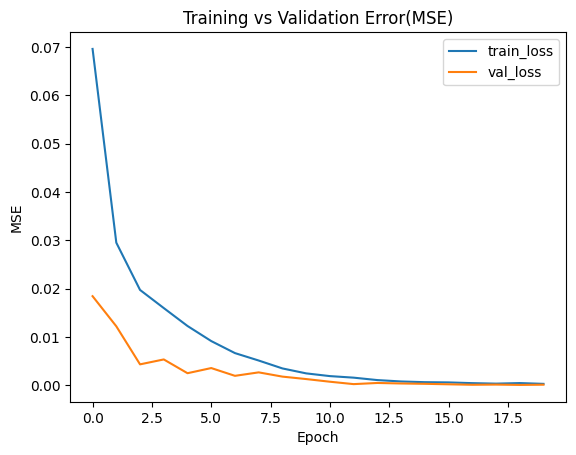

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Error(MSE)')
plt.legend()
plt.show()

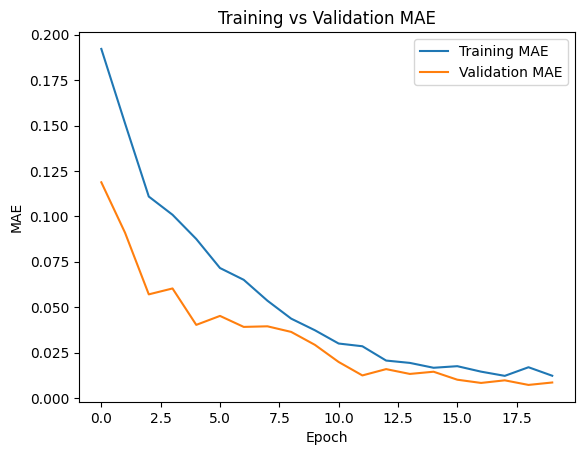

In [ ]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.show()

In [ ]:
y_train_pred = dnn_model.predict(x_train)

mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

print(f"Mean Squared Error on Training Data: {mse}")
print(f"Mean Absolute Error on Training Data: {mae}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error on Training Data: 0.00027269827219416715
Mean Absolute Error on Training Data: 0.01126084982880571


In [ ]:
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training vs Validation Accuracy')
# plt.legend()
# plt.show()